In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

2024-12-13 22:27:18.584405: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-13 22:27:18.585125: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 22:27:18.587563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 22:27:18.594212: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734128838.606082   11103 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734128838.60

In [46]:
df=pd.read_csv('sp500_stocks_final.csv')

In [47]:
df.head(5)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,43.783867,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.509628,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.126682,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.158325,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.469463,70.501671,70.501671,69.648827,69.974915,4073337.0


In [48]:
df.shape

(1788648, 8)

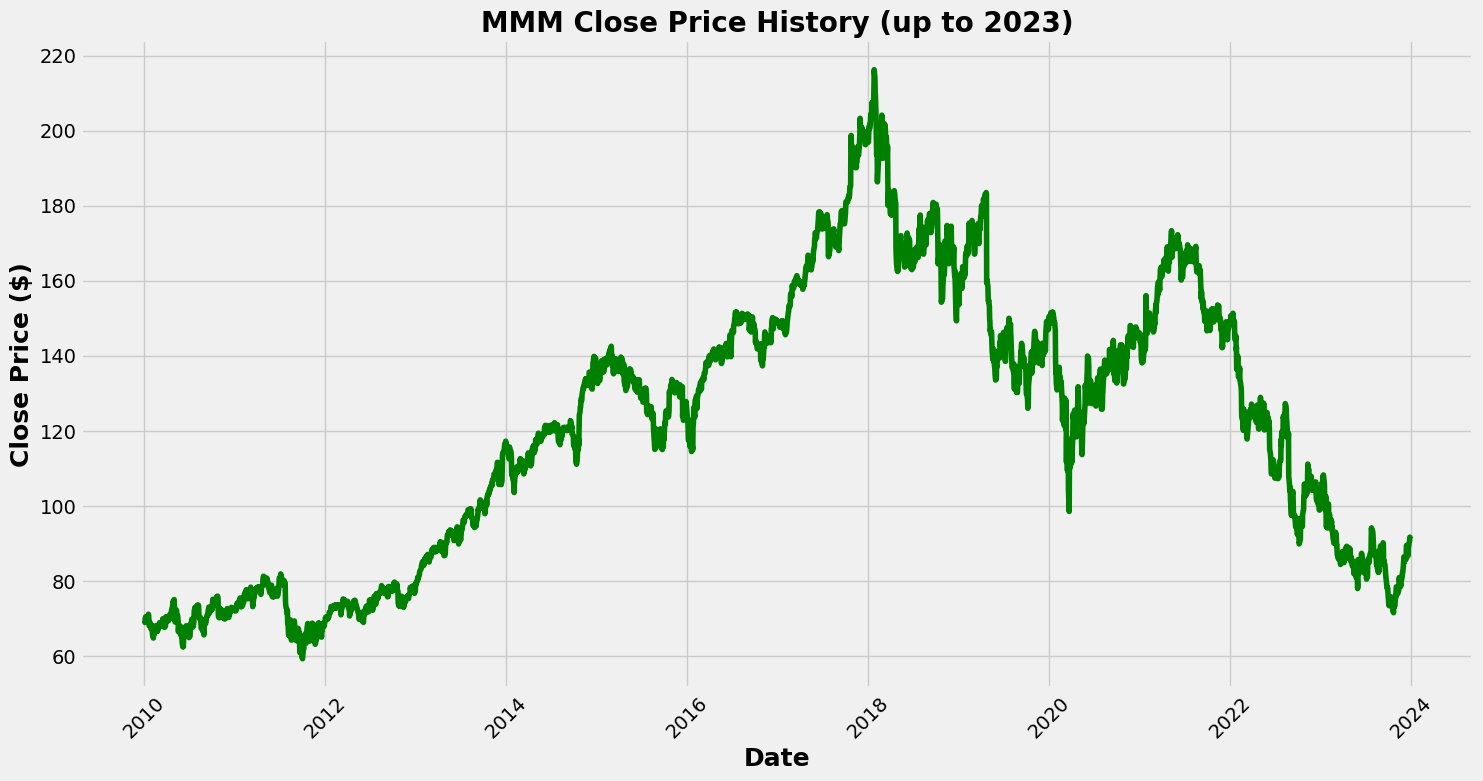

In [49]:

# Certifique-se de que a coluna 'Date' está no formato datetime
mmm_data['Date'] = pd.to_datetime(mmm_data['Date'])

# Agora podemos fazer o filtro corretamente
start_date = mmm_data['Date'].min()
end_date = mmm_data[mmm_data['Date'].dt.year == 2023]['Date'].max()

# Filtra os dados entre as datas definidas
mmm_filtered = mmm_data[(mmm_data['Date'] >= start_date) & (mmm_data['Date'] <= end_date)]



plt.figure(figsize=(16, 8))
plt.title('MMM Close Price History (up to 2023)', fontweight='bold', fontsize=20)
plt.plot(mmm_filtered['Date'], mmm_filtered['Close'], color='green')
plt.xlabel('Date', fontsize=18, fontweight='bold')
plt.ylabel('Close Price ($)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)  
plt.show()


In [50]:
mmm_close = mmm_filtered[['Close']]
print(mmm_close.head())
mmm_close.to_csv('mmm_close_only.csv', index=False)
print("Arquivo 'mmm_close_only.csv' criado com sucesso.")



       Close
0  69.414719
1  68.979935
2  69.958191
3  70.008362
4  70.501671
Arquivo 'mmm_close_only.csv' criado com sucesso.


In [51]:
close_prices = mmm_close['Close'].values
print(close_prices[:5])  
np.save('mmm_close_prices.npy', close_prices)
print("Array NumPy salvo como 'mmm_close_prices.npy'.")


[69.41471863 68.97993469 69.95819092 70.00836182 70.50167084]
Array NumPy salvo como 'mmm_close_prices.npy'.


In [52]:
# Definindo o tamanho dos dados de treinamento (80% dos dados)
train_data_length = int(len(close_prices) * 0.8)

print(f"Tamanho do conjunto de treinamento: {train_data_length}")


Tamanho do conjunto de treinamento: 2817


In [53]:
sc = MinMaxScaler(feature_range=(0, 1))
close_prices_reshaped = close_prices.reshape(-1, 1)
scaled_data = sc.fit_transform(close_prices_reshaped)
print(scaled_data)


[[0.06441132]
 [0.06164093]
 [0.06787426]
 ...
 [0.20143846]
 [0.20649976]
 [0.20452848]]


In [54]:
train_scaled = scaled_data[0:train_data_length, :]
print(train_scaled[:10])
print(f"Tamanho do conjunto de treinamento escalado: {train_scaled.shape}")


[[0.06441132]
 [0.06164093]
 [0.06787426]
 [0.06819394]
 [0.07133724]
 [0.06952585]
 [0.06989877]
 [0.06846029]
 [0.06696859]
 [0.06627599]]
Tamanho do conjunto de treinamento escalado: (2817, 1)


In [55]:
x_train_scaled = [] 
y_train_scaled = []  

for i in range(60, len(train_scaled)):
    x_train_scaled.append(train_scaled[i-60:i, 0])  
    y_train_scaled.append(train_scaled[i, 0])  

x_train_scaled = np.array(x_train_scaled)
y_train_scaled = np.array(y_train_scaled)

print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")


x_train_scaled shape: (2757, 60)
y_train_scaled shape: (2757,)


In [56]:
x_train_scaled[0], y_train_scaled[0]

(array([0.06441132, 0.06164093, 0.06787426, 0.06819394, 0.07133724,
        0.06952585, 0.06989877, 0.06846029, 0.06696859, 0.06627599,
        0.07559938, 0.07346831, 0.06270644, 0.05620672, 0.05807139,
        0.05700588, 0.06057537, 0.05231754, 0.05093235, 0.05066595,
        0.05061267, 0.05631328, 0.04411294, 0.04054345, 0.03516252,
        0.0415024 , 0.04096964, 0.04976028, 0.0439531 , 0.05082579,
        0.04906768, 0.05423549, 0.05641984, 0.05194458, 0.04677677,
        0.04869472, 0.04693661, 0.04912096, 0.05141183, 0.05434205,
        0.05364946, 0.05375602, 0.06132125, 0.055301  , 0.05892383,
        0.05663292, 0.05503465, 0.05567397, 0.05503465, 0.05716572,
        0.05993606, 0.06787426, 0.05876399, 0.05812467, 0.06084178,
        0.05689932, 0.05327649, 0.05364946, 0.05556741, 0.07112412]),
 0.06734149996547223)

In [57]:
x_train_scaled,y_train_scaled = np.array(x_train_scaled),np.array(y_train_scaled)

In [58]:
x_train_scaled = np.reshape(x_train_scaled, (x_train_scaled.shape[0], x_train_scaled.shape[1], 1))

In [59]:
# Build the LSTM network
model = Sequential()
model.add(LSTM(units=50, 
               return_sequences=True, 
               input_shape=(x_train_scaled.shape[1],1)))
# Add dropout with a probability of 0.5
model.add(Dropout(.5)) 
model.add(LSTM(units=50,
               return_sequences=False))
# Add dropout with a probability of 0.5
model.add(Dropout(.5)) 
model.add(Dense(25))
model.add(Dense(1))

c:\Users\rafae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train_scaled, y_train_scaled, epochs=10,   
          batch_size=1, verbose=-1)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [61]:
# Prepara os dados de teste (dados após 2023, apenas janeiro de 2024)
test_scaled = scaled_data[train_data_length - 60:, :]

In [62]:
x_test_scaled = []  
y_test = close_prices[train_data_length:]  

for i in range(60, len(test_scaled)):
    x_test_scaled.append(test_scaled[i-60:i, 0])  # Últimos 60 dias de valores

x_test_scaled = np.array(x_test_scaled)

In [63]:
x_test_scaled = np.reshape(x_test_scaled, (x_test_scaled.shape[0], x_test_scaled.shape[1], 1))

In [68]:
predictions = []
last_60_days = scaled_data[-60:]  # Últimos 60 dias até o final de dezembro de 2023

for i in range(1, 32):  # Previsão para 31 dias de janeiro
    x_test_scaled = last_60_days.reshape(1, 60, 1)  # Prepare a entrada para o modelo (60 dias)
    pred = model.predict(x_test_scaled)
    pred = sc.inverse_transform(pred)  # Desfaz a normalização

    predictions.append(pred[0][0])  # Armazena a previsão

    # Atualiza os dados de entrada para a próxima previsão
    last_60_days = np.append(last_60_days[1:], pred)  # Adiciona a previsão para o próximo cálculo

# Criar dataframe com as previsões para janeiro de 2024
predictions_df = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=31, freq='D'),
    'Predictions': predictions
})


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━

In [71]:
mmm_filtered.loc[:, 'Predictions'] = np.nan

# Usar pd.concat ao invés de append
mmm_filtered = pd.concat([mmm_filtered, predictions_df], ignore_index=True)

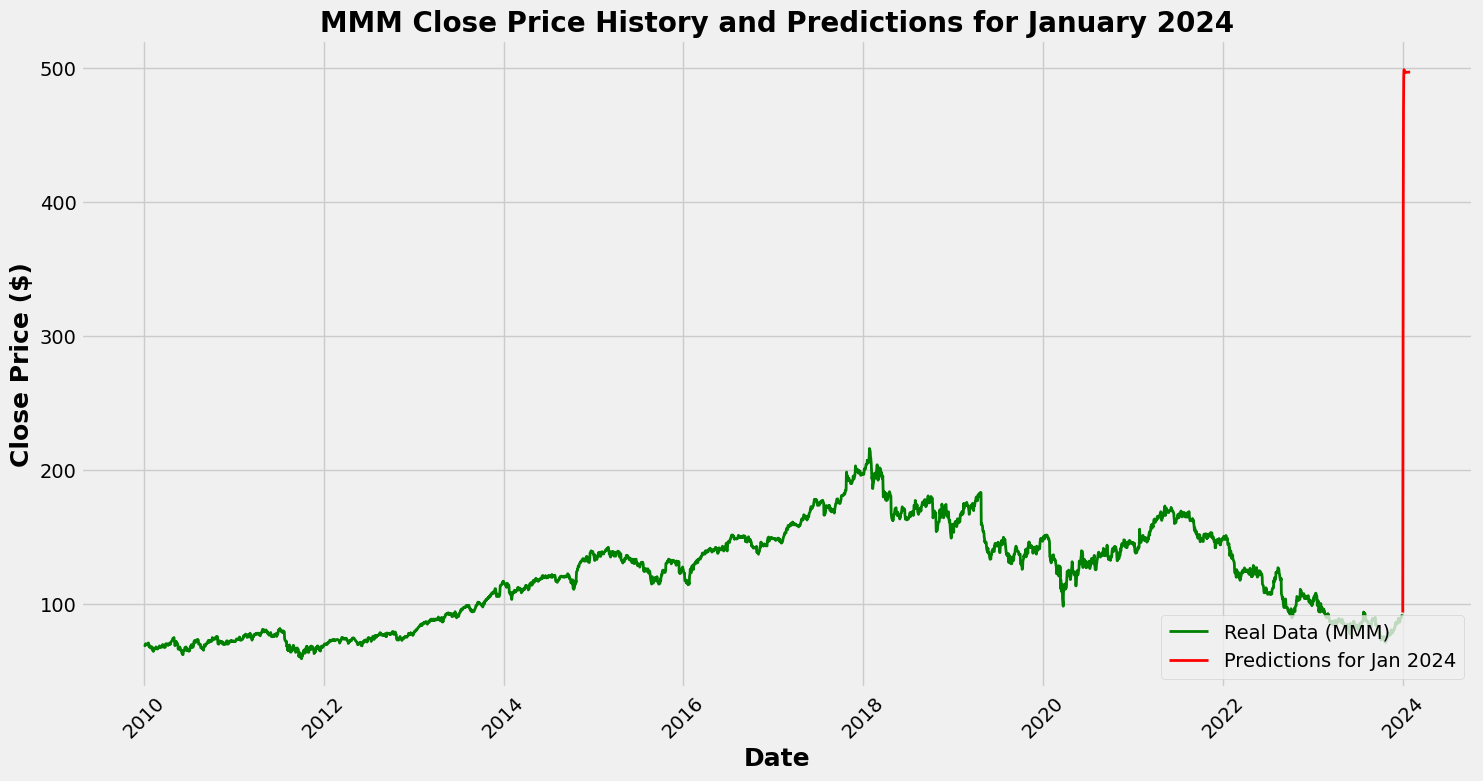

In [72]:
# Plotar os resultados
plt.figure(figsize=(16, 8))
plt.title('MMM Close Price History and Predictions for January 2024', fontweight='bold', fontsize=20)
plt.xlabel('Date', fontsize=18, fontweight='bold')
plt.ylabel('Close Price ($)', fontsize=18, fontweight='bold')

# Plotando os dados reais até 2023 (verde)
plt.plot(mmm_filtered['Date'], mmm_filtered['Close'], color='green', label='Real Data (MMM)', linewidth=2)

# Plotando as previsões para janeiro de 2024 (vermelho)
plt.plot(predictions_df['Date'], predictions_df['Predictions'], color='red', label='Predictions for Jan 2024', linewidth=2)

# Adicionar legenda
plt.legend(loc='lower right')

# Rotacionar as datas no eixo X
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

In [66]:
# Display actual prices vs predictions
valid

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Predictions
2817,2021-03-15,MMM,135.362900,158.428101,158.553513,155.275925,155.543472,3946800.0,149.197739
2818,2021-03-16,MMM,133.484055,156.229095,157.575256,155.501678,157.190628,2707744.0,150.513672
2819,2021-03-17,MMM,134.519943,157.441467,158.854507,156.396317,156.630432,3091780.0,151.199982
2820,2021-03-18,MMM,136.448746,159.698990,160.610367,157.692307,157.692307,3648398.0,151.739960
2821,2021-03-19,MMM,134.812851,157.784286,159.698990,157.767563,159.364548,7987964.0,152.666245
...,...,...,...,...,...,...,...,...,...
3517,2023-12-22,MMM,85.926270,88.904678,89.807693,88.419731,88.528427,2728913.0,91.473923
3518,2023-12-26,MMM,87.364708,90.392975,90.794312,88.854515,88.879601,3332176.0,91.622368
3519,2023-12-27,MMM,87.873817,90.919731,91.220734,90.033447,90.301003,2922785.0,92.152748
3520,2023-12-28,MMM,88.641533,91.714050,92.123749,90.844482,90.852844,3360282.0,92.778618
